In [1]:
import os
import numpy as np
#from scipy import signal
import matplotlib.pyplot as plt

(76, 76)


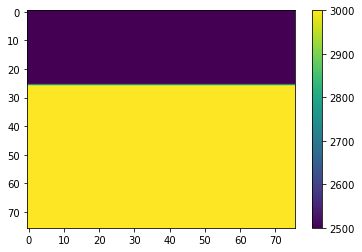

In [2]:
#make model to Xie (2021)
Z1=500; Z2=1000; X=1500
vmin=2500; vmax=3000

h=20  #500/20=25
nz1=26; nz2=50; nz=nz1+nz2; nx=X//h+1

snap_nz=124; snap_nx=124

#5h=lambda=vmin/fmax
fmax=vmin/(5*h) #
fpeak=fmax/2.5  #10 Hz

#make model
vp=np.zeros((nz,nx)); print(vp.shape)
vp[:nz1,:]=vmin; vp[nz1:,:]=vmax

plt.figure; plt.imshow(vp,cmap='viridis',aspect='auto'); plt.colorbar(location='right')
vp.astype('float32').T.tofile('model')


#on time
dt=0.002  #=half of CLF
nt=280

In [7]:
def read(filename,n=(nx,nz)):
    return np.fromfile(filename,dtype='float32').reshape(n).T

tmppath='/home/wzhou/'
#if not os.path.exists(tmppath): tmppath='/home/zhouw/'
tmppath=tmppath+'tmp'

def read_snap(filename,i=1,n=(snap_nx,snap_nz)):
    bs=4*n[0]*n[1]
    skip=i-1
    print(bs,skip)
    !dd if=$filename of=$tmppath bs=$bs skip=$skip count=1
    data=read(tmppath,n=n)
    !rm $tmppath
    return data
    
def read_su(filename):
    !sustrip < $filename > $tmppath outpar=outpar
    data=read(tmppath,n=(ntr,nt))
    !rm $tmppath
    return data

def imshow(data,perc=None,clip=None,clipmin=None,cmap='viridis',title=None,grid=True):
    
    if perc==None:
        clipp=[np.amin(data),np.amax(data)]
    else:
        tmp=np.percentile(np.abs(data),q=perc)
        clipp=[-tmp,tmp]
    
    if clip!=None: clipp=clip
    
    if clipmin!=None: clipp[0]=clipmin
    
    plt.imshow(data,vmin=clipp[0],vmax=clipp[1],cmap=cmap,aspect='auto')
    plt.colorbar(location='right')
    plt.grid(visible=grid, axis='both', which='both', color='w', linestyle='--',linewidth=0.5)
    #plt.xlabel(labels[0]); plt.ylabel(labels[1])
    if title!=None: plt.title(title)

In [4]:
!cat setup_default

MODEL_SIZE              '76 76 1'
MODEL_SPACING           '20 20 1'
FILE_MODEL              'model'
MODEL_ATTRIBUTES         vp
FILE_TOPO               'topo'

IS_FREESURFACE          F

ACQUI_GEOMETRY          spread
FS                      '20 760 0'
FR                      '20   0 0'
DR                      '0   20  0'
NR                      76

SCOMP                   p
RCOMP                   p #'p vz'

NT               280
DT               0.002

## for RTM ##
FILE_DATA_PREFIX    'results_fwd/dobs_Shot'

FPEAK            10
WAVELET_TYPE        'ricker'
T0			0.15
UPDATE_WAVELET		'no'
RDT			0


SNAPSHOT     'p poynz poynx'
#NSNAPSHOT    50

IF_USE_CHECKPOINT   F



## Poynting in forward
$\vec{s} = P \dot{P} \nabla{P} $

In [5]:
!cp setup_default setup
!echo "DIR_OUT     results_obs" >> setup
!ulimit -s unlimited; ../../exe/FWD setup > out_fwd

61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000218115 s, 282 MB/s
61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000206258 s, 298 MB/s
61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000209432 s, 294 MB/s


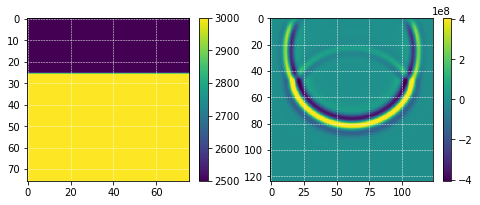

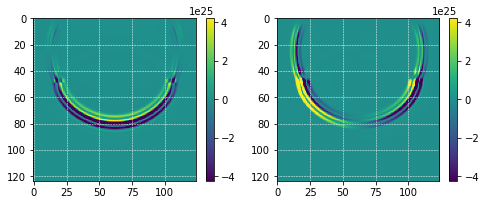

In [11]:
## plot
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(read('model'))
plt.subplot(1,2,2); imshow(read_snap('results_obs/snap_field%p',i=47),perc=98)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(read_snap('results_obs/snap_field%poynz',i=47),perc=98)
plt.subplot(1,2,2); imshow(read_snap('results_obs/snap_field%poynx',i=47),perc=98)

$\vec{s} = \dot{P} \nabla{P} $

61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000251029 s, 245 MB/s
61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000224178 s, 274 MB/s
61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000222706 s, 276 MB/s


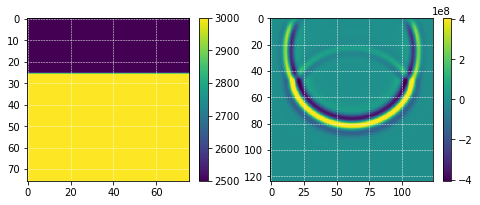

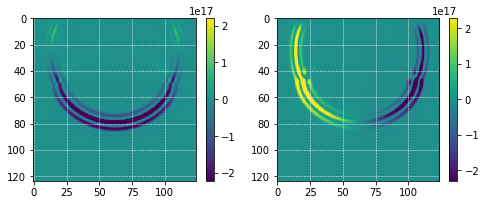

In [12]:
!cp setup_default setup
!echo "DIR_OUT     results_obs" >> setup
!echo "POYNTING_DEF     dotp_nabp" >> setup
!ulimit -s unlimited; ../../exe/FWD setup > out_fwd

## plot
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(read('model'))
plt.subplot(1,2,2); imshow(read_snap('results_obs/snap_field%p',i=47),perc=98)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(read_snap('results_obs/snap_field%poynz',i=47),perc=98)
plt.subplot(1,2,2); imshow(read_snap('results_obs/snap_field%poynx',i=47),perc=98)

$\vec{s} = \vec{\vec{\sigma}}\cdot\vec{v} = P\vec{v} $

61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000304273 s, 202 MB/s
61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000209718 s, 293 MB/s
61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000264625 s, 232 MB/s


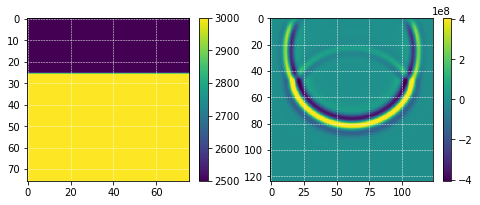

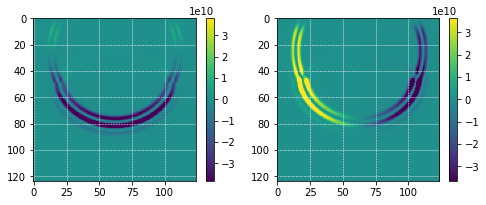

In [13]:
!cp setup_default setup
!echo "DIR_OUT     results_obs" >> setup
!echo "POYNTING_DEF     p_v" >> setup
!ulimit -s unlimited; ../../exe/FWD setup > out_fwd

## plot
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(read('model'))
plt.subplot(1,2,2); imshow(read_snap('results_obs/snap_field%p',i=47),perc=98)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(read_snap('results_obs/snap_field%poynz',i=47),perc=98)
plt.subplot(1,2,2); imshow(read_snap('results_obs/snap_field%poynx',i=47),perc=98)

$\vec{s} = E^2\nabla\phi $

61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000307275 s, 200 MB/s
61504 46
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000245762 s, 250 MB/s


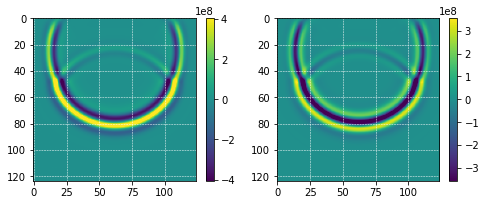

In [15]:
!suhilb < results_obs/wavelet.su > conj_wavelet.su
!cp setup_default setup
!echo "DIR_OUT     results_obs_conj" >> setup
!echo "FILE_WAVELET    conj_wavelet.su" >> setup
!ulimit -s unlimited; ../../exe/FWD setup > out_fwd

## plot
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(read_snap('results_obs/snap_field%p',i=47),perc=98)
plt.subplot(1,2,2); imshow(read_snap('results_obs_conj/snap_field%p',i=47),perc=98)

# plt.figure(figsize=(8,3))
# plt.subplot(1,2,1); imshow(read_snap('results_obs/snap_field%poynz',i=47),perc=98)
# plt.subplot(1,2,2); imshow(read_snap('results_obs/snap_field%poynx',i=47),perc=98)

In [24]:
!gfortran compute_E_ph.f90
!echo "'./results_obs/snap_field%p' './results_obs_conj/snap_field%p' 47" > par
!./a.out < par

61504 0
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000314284 s, 196 MB/s
61504 0
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000226007 s, 272 MB/s
61504 0
1+0 records in
1+0 records out
61504 bytes (62 kB, 60 KiB) copied, 0.000206935 s, 297 MB/s


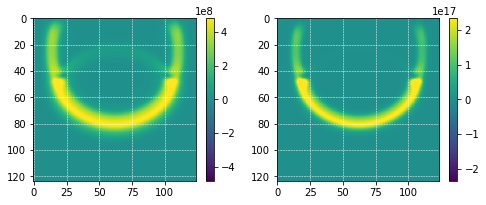

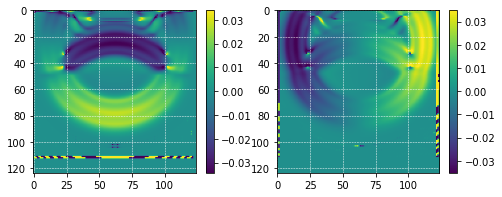

In [26]:
## plot
plt.figure(figsize=(8,3))
E=read_snap('E',i=1)
plt.subplot(1,2,1); imshow(E,perc=98)
plt.subplot(1,2,2); imshow(E**2,perc=98)

plt.figure(figsize=(8,3))
dph_dz=read_snap('dph_dz',i=1)
dph_dx=read_snap('dph_dx',i=1)
plt.subplot(1,2,1); imshow(dph_dz,perc=98)
plt.subplot(1,2,2); imshow(dph_dx,perc=98)

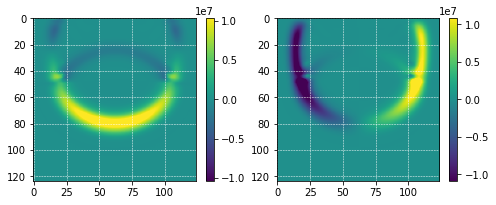

In [28]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(E*dph_dz,perc=98)
plt.subplot(1,2,2); imshow(E*dph_dx,perc=98)

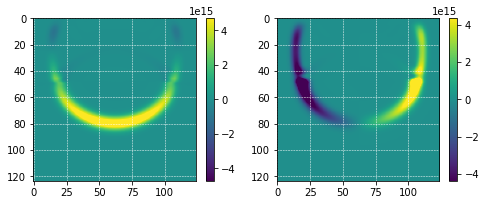

In [29]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); imshow(E**2*dph_dz,perc=98)
plt.subplot(1,2,2); imshow(E**2*dph_dx,perc=98)

**Test PFEI with ricker-wavelet data (NOT envelope data)** 

## PFEI build tilD
### PFEI gradient for tilD

In [3]:
# # with reflections
# !makevel nz=51 nx=$nx v000=1500 > vp1
# !makevel nz=50 nx=$nx v000=1800 > vp2
# !cat vp1  vp2  > tmp1 && transp < tmp1 n1=$nx > model
# !rm vp1 vp2 rho1 rho2 tmp*

# w/o reflections
!makevel nz=$nz nx=$nx v000=1500 > model

!cp setup.in setup_grad.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_grad.in

!../../exe/PFEI setup_grad.in  > out_grad
!rm -r results_grad; mv results results_grad

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


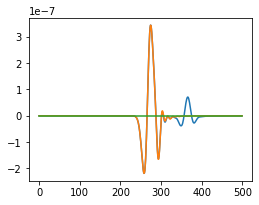

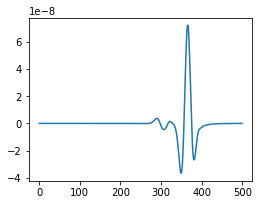

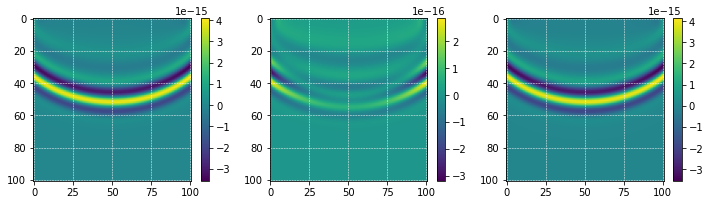

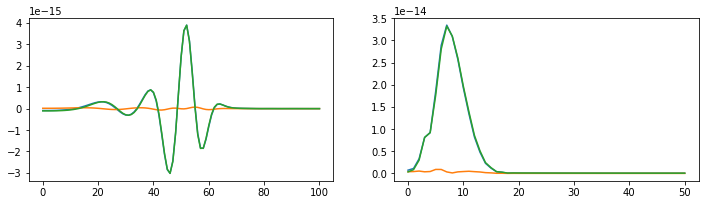

In [4]:
plt.figure(figsize=(4,3))
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RE0_Shot0001.su'))
plt.plot(read_su('results_grad/RdE_Shot0001.su'))

plt.figure(figsize=(4,3))
plt.plot(read_su('results_grad/dadj_Shot0001.su'))

plt.figure(figsize=(12,3))
plt.subplot(1,3,1);tmp1=read('results_grad/gtilD_dt2'); imshow(tmp1)
plt.subplot(1,3,2);tmp2=1800**2*read('results_grad/gtilD_nab2'); imshow(tmp2)
plt.subplot(1,3,3);imshow(tmp1-tmp2)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.plot(tmp1[:,50]); plt.plot(tmp2[:,50]); plt.plot(tmp1[:,50]-tmp2[:,50])
plt.subplot(1,2,2); plt.plot(amp_spec(tmp1[:,50])); plt.plot(amp_spec(tmp2[:,50])); plt.plot(amp_spec(tmp1[:,50]-tmp2[:,50]))

# plt.figure(figsize=(12,3))
# plt.subplot(1,3,1);imshow(signal.medfilt2d(tmp1))
# plt.subplot(1,3,2);imshow(signal.medfilt2d(tmp2))
# plt.subplot(1,3,3);imshow(signal.medfilt2d(tmp1)-signal.medfilt2d(tmp2))

### GradientTest

In [38]:
# w/o reflections
!makevel nz=$nz nx=$nx v000=1500 > model

!make

!cp setup.in setup_test.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_test.in
!echo "JOB   'build tilD'" >> setup_test.in
!echo "ALPHAS '-1e-2 -1e-3 -1e-4 1e-4 1e-3 1e-2' " >> setup_test.in

!rm -r results
!../../exe/GradientTest  setup_test.in > out

!echo '            alpha    pert%f    curr%f    (pert%f-curr%f)/alpha    curr%g_dot_d    if_1st_cond'
!grep '1st cond' out

#System
(cd ../../Modules/System; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'
#Etc
(cd ../../Modules/Etc; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'
#Signal
(cd ../../Modules/Signal; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'
#Modeling
(cd ../../Modules/Modeling; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'
#Kernel
(cd ../../Modules/Kernel; make App=FWI)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Kernel'
m_parametrizer_vp2-tilD.f90 m_querypoint.f90 m_weighter.f90 m_preconditioner.f90 m_fo

In [40]:
# w/o reflections
!makevel nz=$nz nx=$nx v000=1500 > model

!make

!cp setup.in setup_test.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_test.in
!echo "JOB   'build tilD'" >> setup_test.in
# !echo "DESCENT_DIR   'stack'" >> setup_test.in
#!echo "PRECO   'none'" >> setup_test.in
!echo "ALPHAS '4e-3' " >> setup_test.in

!rm -r results
!../../exe/GradientTest  setup_test.in > out

!echo '            alpha    pert%f    curr%f    (pert%f-curr%f)/alpha    curr%g_dot_d    if_1st_cond'
!grep '1st cond' out

#System
(cd ../../Modules/System; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'
#Etc
(cd ../../Modules/Etc; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'
#Signal
(cd ../../Modules/Signal; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'
#Modeling
(cd ../../Modules/Modeling; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'
#Kernel
(cd ../../Modules/Kernel; make App=FWI)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Kernel'
m_parametrizer_vp2-tilD.f90 m_querypoint.f90 m_weighter.f90 m_preconditioner.f90 m_fo

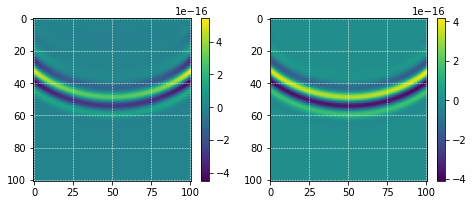

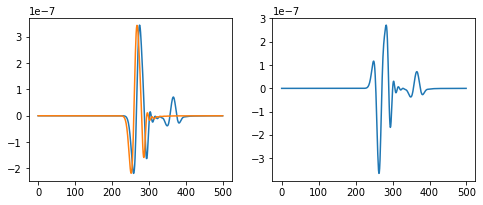

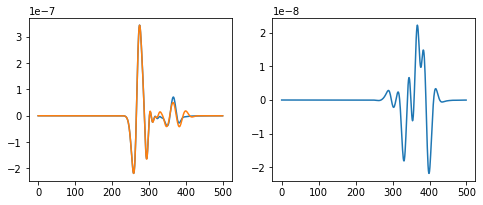

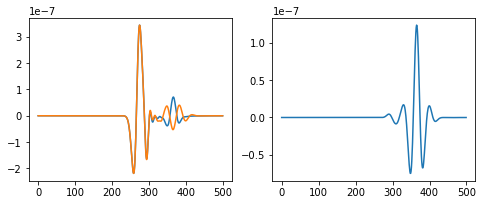

In [41]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
imshow(read('results/qp0%g'))
plt.subplot(1,3,2)
imshow(read('results/qp0%pg'))
# plt.subplot(1,3,3)
# imshow(read('results/curr%d'))

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RE0_Shot0001.su'))
plt.subplot(1,2,2)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su')-read_su('results_grad/RE0_Shot0001.su'))

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results/RE0_Shot0001.su')+read_su('results/RdE_Shot0001.su'))
plt.subplot(1,2,2)
plt.plot(read_su('results/dadj_Shot0001.su'))

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results/RE0_Shot0001.su')-read_su('results/RdE_Shot0001.su'))
plt.subplot(1,2,2)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su')-(read_su('results/RE0_Shot0001.su')-read_su('results/RdE_Shot0001.su')))


## PFEI update vp2
### PFEI gradient for vp2

In [52]:
# with nonzero tilD
!makevel nz=$nz nx=$nx v000=1550 > vp
#from PFEI gradient test w/ ALPHAS 1e-3
#cp results/pert%x prior_tilD_scaled
!farith < prior_tilD_scaled op=scale scale=10 | farith op=bias bias=-5 > tilD
!cat vp tilD > model

!cp setup-vp2.in setup_grad.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_grad.in
#!echo "WEIGHTING    polygon" >> setup_grad.in
#!echo "FILE_WEIGHT_POLYGON    wei_notEnv" >> setup_grad.in

!../../exe/PFEI setup_grad.in  > out_grad
!rm -r results_grad; mv results results_grad

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


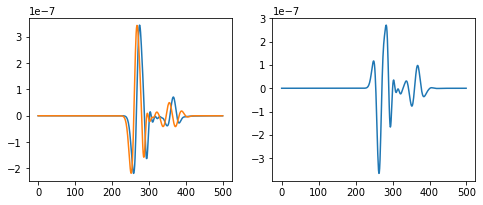

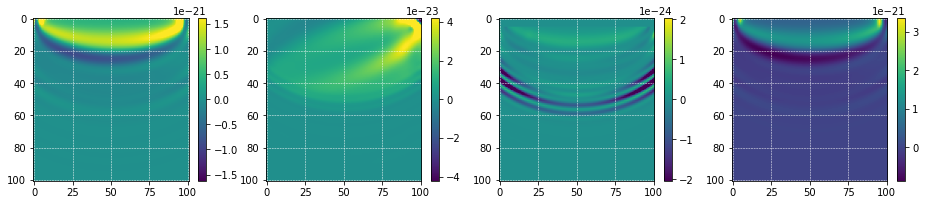

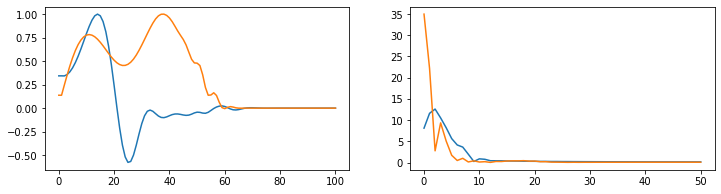

In [53]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RE0_Shot0001.su')+read_su('results_grad/RdE_Shot0001.su'))
plt.subplot(1,2,2)
plt.plot(read_su('results_grad/dadj_Shot0001.su'))

tilD=read('tilD')

plt.figure(figsize=(16,3))
plt.subplot(1,4,1);tmp1=read('results_grad/gvp2_F1_star_E0'); imshow(tmp1,perc=99)
plt.subplot(1,4,2);tmp2=read('results_grad/gvp2_F2_star_dE'); imshow(tmp2,perc=99)
plt.subplot(1,4,3);tmp3=tilD*read('results_grad/gvp2_F2_star_E0'); imshow(tmp3,perc=99)
plt.subplot(1,4,4);imshow(tmp1+tmp2-tmp3)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
tmp1=tmp1[:,50]; tmp1=tmp1/np.amax(np.abs(tmp1)); plt.plot(tmp1)
tmp2=tmp2[:,50]; tmp2=tmp2/np.amax(np.abs(tmp2)); plt.plot(tmp2)

plt.subplot(1,2,2)
plt.plot(amp_spec(tmp1))
plt.plot(amp_spec(tmp2))

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


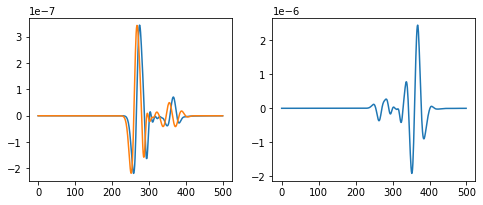

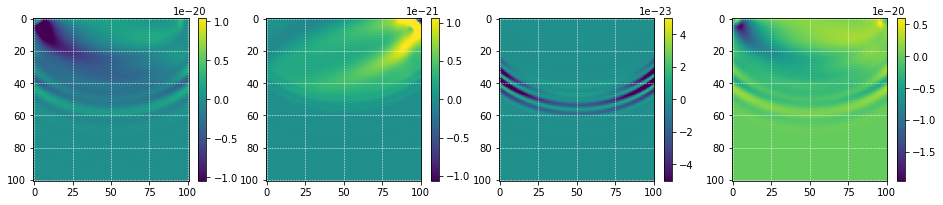

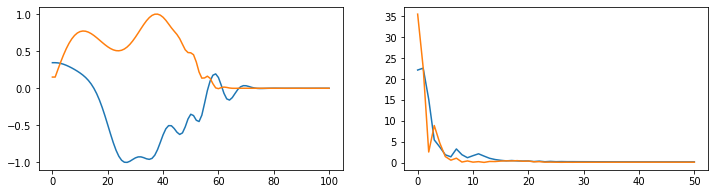

In [54]:
# with nonzero tilD
!makevel nz=$nz nx=$nx v000=1550 > vp
#from PFEI gradient test w/ ALPHAS 1e-3
#!cp results/pert%x prior_tilD_scaled
!farith < prior_tilD_scaled op=scale scale=10 | farith op=bias bias=-5 > tilD
!cat vp tilD > model

!cp setup-vp2.in setup_grad.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_grad.in
!echo "WEIGHTING    polygon" >> setup_grad.in
!echo "FILE_WEIGHT_POLYGON    wei_notEnv" >> setup_grad.in

!../../exe/PFEI setup_grad.in  > out_grad
!rm -r results_grad; mv results results_grad

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RE0_Shot0001.su')+read_su('results_grad/RdE_Shot0001.su'))
plt.subplot(1,2,2)
plt.plot(read_su('results_grad/dadj_Shot0001.su'))

tilD=read('tilD')

plt.figure(figsize=(16,3))
plt.subplot(1,4,1);tmp1=read('results_grad/gvp2_F1_star_E0'); imshow(tmp1,perc=99)
plt.subplot(1,4,2);tmp2=read('results_grad/gvp2_F2_star_dE'); imshow(tmp2,perc=99)
plt.subplot(1,4,3);tmp3=tilD*read('results_grad/gvp2_F2_star_E0'); imshow(tmp3,perc=99)
plt.subplot(1,4,4);imshow(tmp1+tmp2-tmp3)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
tmp1=tmp1[:,50]; tmp1=tmp1/np.amax(np.abs(tmp1)); plt.plot(tmp1)
tmp2=tmp2[:,50]; tmp2=tmp2/np.amax(np.abs(tmp2)); plt.plot(tmp2)

plt.subplot(1,2,2)
plt.plot(amp_spec(tmp1))
plt.plot(amp_spec(tmp2))

### Gradient test

In [78]:
!make

!cp setup-vp2.in setup_test.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_test.in
#!echo "WEIGHTING    polygon" >> setup_test.in
#!echo "FILE_WEIGHT_POLYGON    wei_notEnv" >> setup_test.in
!echo "ALPHAS '-1e4 1e4 1e5 5e5 1e6' " >> setup_test.in
#!echo "ALPHAS '1e5' " >> setup_test.in

!rm -r results
!../../exe/GradientTest  setup_test.in > out

!echo '            alpha    pert%f    curr%f    (pert%f-curr%f)/alpha    curr%g_dot_d    if_1st_cond'
!grep '1st cond' out

#System
(cd ../../Modules/System; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'
#Etc
(cd ../../Modules/Etc; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'
#Signal
(cd ../../Modules/Signal; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'
#Modeling
(cd ../../Modules/Modeling; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'
#Kernel
(cd ../../Modules/Kernel; make App=FWI)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Kernel'
m_parametrizer_vp2-tilD.f90 m_querypoint.f90 m_weighter.f90 m_preconditioner.f90 m_fo

In [79]:
!make

!cp setup-vp2.in setup_test.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_test.in
#!echo "WEIGHTING    polygon" >> setup_test.in
#!echo "FILE_WEIGHT_POLYGON    wei_notEnv" >> setup_test.in
#!echo "ALPHAS '-1e4 -1e3 1e-3 1e4' " >> setup_test.in
!echo "ALPHAS '1e5' " >> setup_test.in

!rm -r results
!../../exe/GradientTest  setup_test.in > out

!echo '            alpha    pert%f    curr%f    (pert%f-curr%f)/alpha    curr%g_dot_d    if_1st_cond'
!grep '1st cond' out

#System
(cd ../../Modules/System; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'
#Etc
(cd ../../Modules/Etc; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'
#Signal
(cd ../../Modules/Signal; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'
#Modeling
(cd ../../Modules/Modeling; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'
#Kernel
(cd ../../Modules/Kernel; make App=FWI)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Kernel'
m_parametrizer_vp2-tilD.f90 m_querypoint.f90 m_weighter.f90 m_preconditioner.f90 m_fo

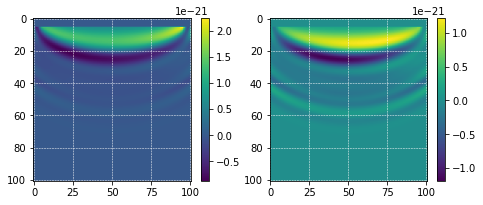

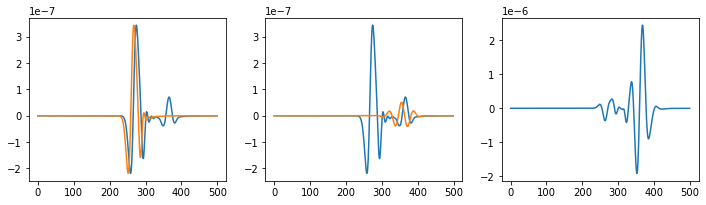

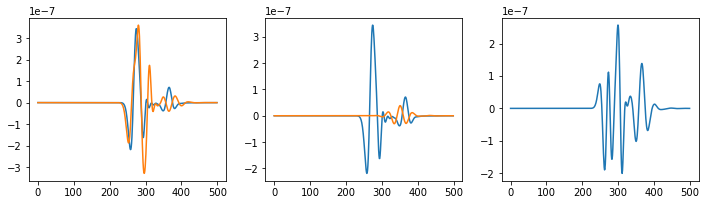

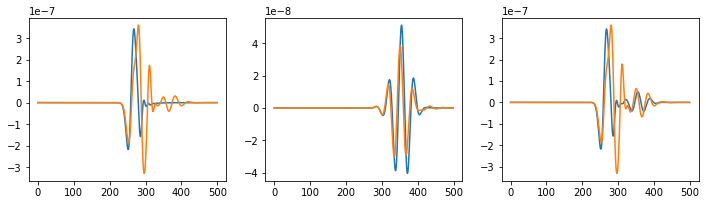

In [80]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
imshow(read('results/qp0%g'))
plt.subplot(1,3,2)
imshow(read('results/qp0%pg'))
# plt.subplot(1,3,3)
# imshow(read('results/curr%d'))

#before
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RE0_Shot0001.su'))
plt.subplot(1,3,2)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RdE_Shot0001.su'))
plt.subplot(1,3,3)
plt.plot(read_su('results_grad/dadj_Shot0001.su'))

#after
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results/RE0_Shot0001.su'))
plt.subplot(1,3,2)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results/RdE_Shot0001.su'))
plt.subplot(1,3,3)
plt.plot(read_su('results/dadj_Shot0001.su'))

#syn's before vs after
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(read_su('results_grad/RE0_Shot0001.su'))
plt.plot(read_su(     'results/RE0_Shot0001.su'))
plt.subplot(1,3,2)
plt.plot(read_su('results_grad/RdE_Shot0001.su'))
plt.plot(read_su(     'results/RdE_Shot0001.su'))
plt.subplot(1,3,3)
plt.plot(read_su('results_grad/RE0_Shot0001.su')+read_su('results_grad/RdE_Shot0001.su'))
plt.plot(read_su(     'results/RE0_Shot0001.su')+read_su(     'results/RdE_Shot0001.su'))

In [83]:
!make

!cp setup-vp2.in setup_test.in
!echo "FILE_DATA_PREFIX    'results_fwd/dsyn_Shot'" >> setup_test.in
!echo "SMOOTHING    'Laplacian'" >> setup_test.in
!echo "LAP_FRAC     '0.5 0.5 0.5'" >> setup_test.in
#!echo "WEIGHTING    polygon" >> setup_test.in
#!echo "FILE_WEIGHT_POLYGON    wei_notEnv" >> setup_test.in
#!echo "ALPHAS '-1e4 -1e3 1e-3 1e4' " >> setup_test.in
!echo "ALPHAS '1e5' " >> setup_test.in

!rm -r results
!../../exe/GradientTest  setup_test.in > out

!echo '            alpha    pert%f    curr%f    (pert%f-curr%f)/alpha    curr%g_dot_d    if_1st_cond'
!grep '1st cond' out

#System
(cd ../../Modules/System; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/System'
#Etc
(cd ../../Modules/Etc; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Etc'
#Signal
(cd ../../Modules/Signal; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Signal'
#Modeling
(cd ../../Modules/Modeling; make)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'

make[1]: Leaving directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Modeling'
#Kernel
(cd ../../Modules/Kernel; make App=FWI)
make[1]: Entering directory '/home/wzhou/Codes/GitHub/SeisJIMU/Modules/Kernel'
m_parametrizer_vp2-tilD.f90 m_querypoint.f90 m_weighter.f90 m_preconditioner.f90 m_fo

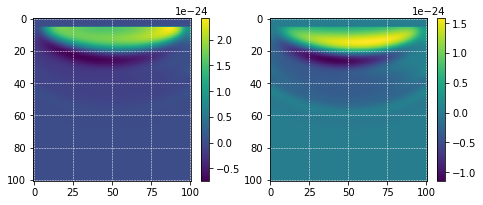

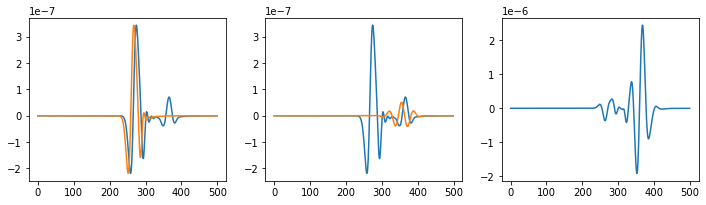

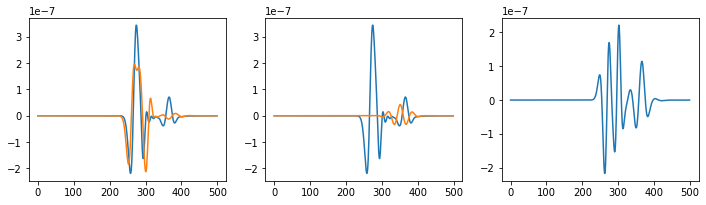

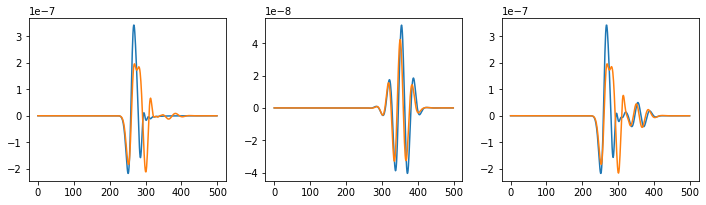

In [84]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
imshow(read('results/qp0%g'))
plt.subplot(1,3,2)
imshow(read('results/qp0%pg'))
# plt.subplot(1,3,3)
# imshow(read('results/curr%d'))

#before
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RE0_Shot0001.su'))
plt.subplot(1,3,2)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results_grad/RdE_Shot0001.su'))
plt.subplot(1,3,3)
plt.plot(read_su('results_grad/dadj_Shot0001.su'))

#after
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results/RE0_Shot0001.su'))
plt.subplot(1,3,2)
plt.plot(read_su('results_fwd/dsyn_Shot0001.su'))
plt.plot(read_su('results/RdE_Shot0001.su'))
plt.subplot(1,3,3)
plt.plot(read_su('results/dadj_Shot0001.su'))

#syn's before vs after
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(read_su('results_grad/RE0_Shot0001.su'))
plt.plot(read_su(     'results/RE0_Shot0001.su'))
plt.subplot(1,3,2)
plt.plot(read_su('results_grad/RdE_Shot0001.su'))
plt.plot(read_su(     'results/RdE_Shot0001.su'))
plt.subplot(1,3,3)
plt.plot(read_su('results_grad/RE0_Shot0001.su')+read_su('results_grad/RdE_Shot0001.su'))
plt.plot(read_su(     'results/RE0_Shot0001.su')+read_su(     'results/RdE_Shot0001.su'))